In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb

In [ ]:
# Define color array for plotting
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
# Load dataset
cropdf = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Declare independent and target variables
X = cropdf.drop('label', axis=1)
y = cropdf['label']

In [ ]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [ ]:
# Train LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.9894


In [ ]:
# Training set accuracy
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training-set accuracy score: {0:0.4f}'.format(train_accuracy))

Training-set accuracy score: 1.0000


In [ ]:
# Print scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


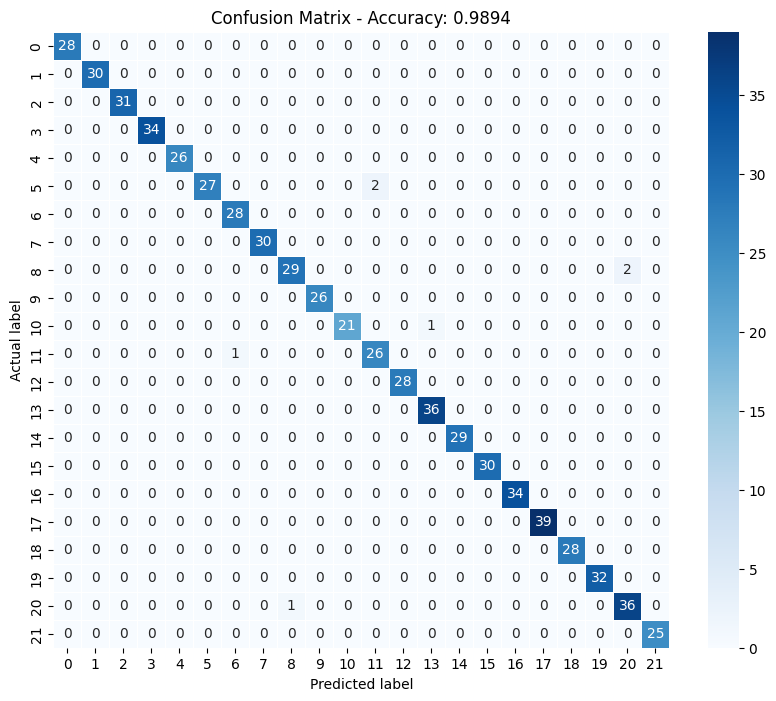

In [ ]:
# View confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Accuracy: {:.4f}'.format(accuracy))
plt.show()

In [ ]:
# View classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.93      0.96      0.95        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      1.00      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [ ]:
# Example prediction
# new_data = [[98,35,18,23.79746068,74.82913698,6.252797547999999,91.76337172]]
# predicted_crop = model.predict(new_data)
# print('Predicted crop for new data:', predicted_crop)
import joblib

In [ ]:
# Train your model as you did before
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [ ]:
# Save the model
joblib.dump(model, '/content/drive/MyDrive/lgbm_model.pkl')

['/content/drive/MyDrive/lgbm_model.pkl']

In [ ]:
# Example prediction
new_data = [[30,39,18,23.79746068,74.82913698,6.252797547999999,91.76337172]]
predicted_crop = model.predict(new_data)
print('Predicted crop for new data:', predicted_crop)

Predicted crop for new data: ['jute']
